In [2]:
import pandas as pd
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt

In [3]:
court = pd.read_csv("Ccourts.csv", parse_dates=True)
court = court['neighborhood'].value_counts().reset_index().rename({'index' : 'hood', 'neighborhood' : 'park count'}, axis=1)
court

,hood,park count
0,Squirrel Hill South,26
1,Highland Park,20
2,Hazelwood,10
3,Allegheny Center,9
4,Beltzhoover,9
...,...,...
58,Polish Hill,1
59,Central Lawrenceville,1
60,Larimer,1
61,Strip District,1


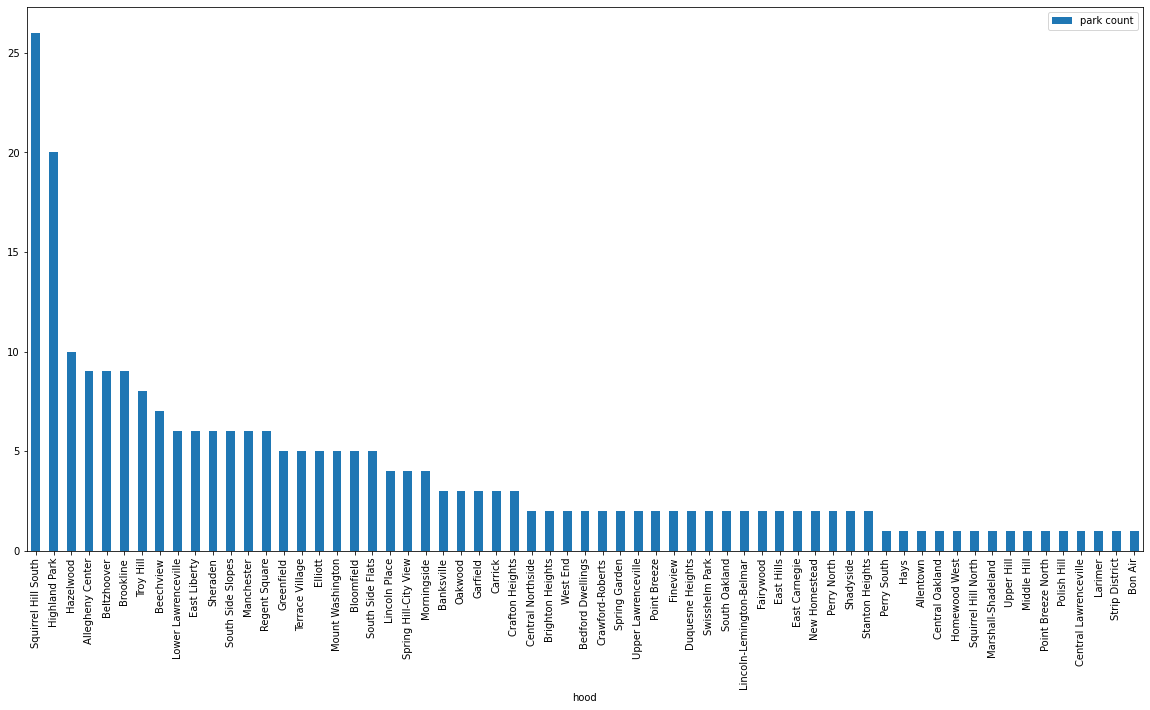

In [5]:
import pylab
pylab.figure(figsize=(20, 10))
ax=pylab.gca()
court.plot(kind='bar', x='hood', y='park count', ax=ax)

In [6]:
courtMean = court.mean()
print('The mean amount of courts in Pittsburgh is: ')
print(courtMean)

The mean amount of courts in Pittsburgh is: 
park count    3.904762
dtype: float64


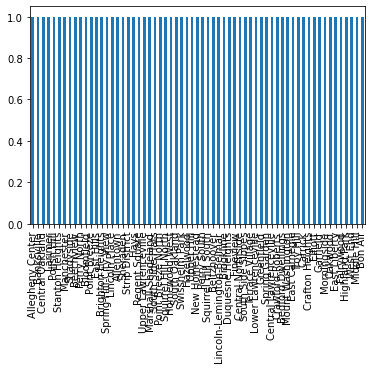

In [7]:
court['hood'].value_counts().plot.bar()

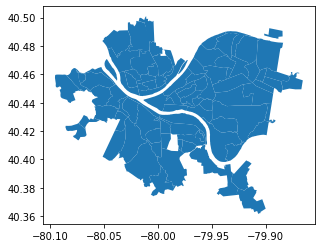

In [8]:
neighborhoods = geopandas.read_file('Neighborhoods_.shp')
neighborhoods.plot()

In [9]:
court_map = neighborhoods.merge(court, how='left', left_on='hood', right_on='hood')
court_map.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry,park count
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442...",1.0
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458...",NaN
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442...",NaN
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446...",2.0
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456...",1.0


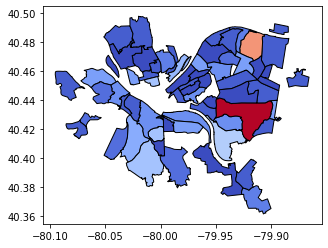

In [16]:
court_map.plot(column='park count',
                cmap='coolwarm',
                edgecolor='black',
              )